In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [25]:
gold_data=pd.read_csv('gld_price_data.csv')

In [26]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [27]:
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [28]:
gold_data.shape

(2290, 6)

In [29]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [30]:
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [31]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [32]:
correlation = gold_data.corr(numeric_only=True)


<Axes: >

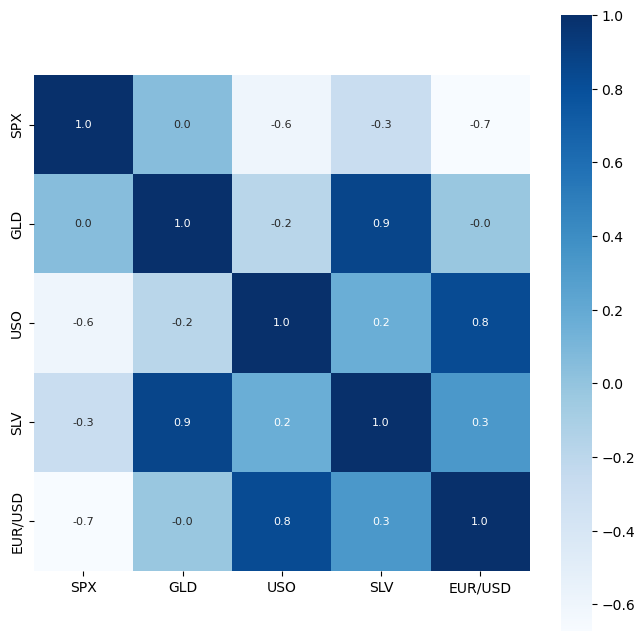

In [33]:
plt.figure(figsize=(8,8))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

In [34]:
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


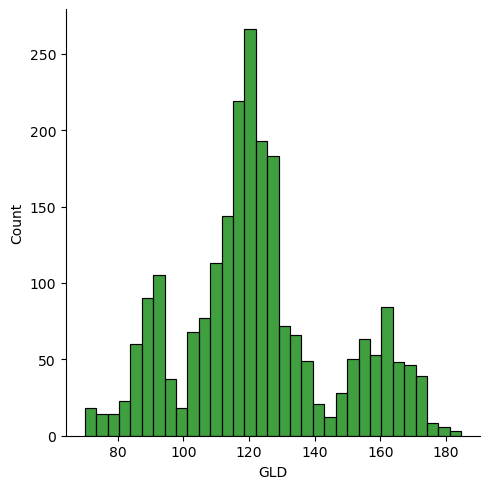

In [35]:
sns.displot(gold_data['GLD'],color='green')

In [36]:
x=gold_data.drop(['Date','GLD'],axis=1)
y=gold_data['GLD']

In [37]:
print(x)


              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [38]:
print(y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [39]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [40]:
regressor=RandomForestRegressor(n_estimators=100)
regressor.fit(x_train,y_train)

RandomForestRegressor()

In [41]:
test_data_prediction=regressor.predict(x_test)

In [42]:
print(test_data_prediction)

[168.4539995   82.19059988 115.94490048 127.57320094 120.6696014
 154.72229761 149.91079858 126.17250013 117.34809895 125.95300087
 116.68170089 171.37690079 142.04519913 167.76749886 115.27210008
 117.67850046 138.28570374 170.41420142 159.53000259 158.16709948
 155.15260033 125.15670016 175.94519936 157.42940325 125.11410017
  93.82509962  77.5231001  120.40520006 119.16819963 167.48370009
  88.21020059 125.30550046  91.22350051 117.70090024 121.18319916
 136.22600054 115.47160105 114.85270078 145.86409988 107.14990112
 104.29350272  87.21299777 126.52080044 118.05459981 153.56449862
 119.44140032 108.55629994 107.94309829  93.08090009 126.96909814
  74.56750046 113.66629913 121.18669981 111.39269917 119.00879903
 120.44229955 158.52170035 168.58840088 147.17399686  85.57539844
  94.37270049  86.73569895  90.61360023 118.95380074 126.42000074
 127.46350037 170.16600031 122.2452991  117.38769904  98.62900032
 168.64150148 143.2752982  132.20330212 121.21670211 121.6790991
 119.7387003

In [44]:
error_score=metrics.r2_score(y_test,test_data_prediction)

In [45]:
print("R squared error:",error_score)

R squared error: 0.9892625637601928


In [46]:
y_test=list(y_test)

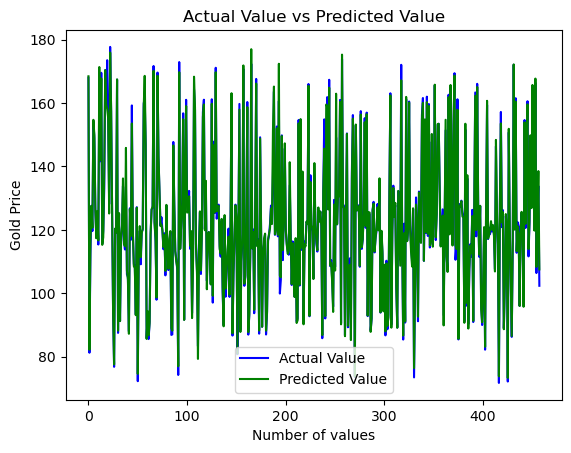

In [51]:
plt.plot(y_test,color='blue',label="Actual Value")
plt.plot(test_data_prediction,color='green',label="Predicted Value")
plt.title("Actual Value vs Predicted Value")
plt.xlabel('Number of values')
plt.ylabel('Gold Price')
plt.legend()
plt.show()